# Prediction using Unsupervised ML (Task 1)

# submitted by - Deepti Sardar

Task1 : Using the Iris dataset,predict the optinum no. of cluster and represent it visually.

In [14]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors

In [3]:
#load the dataset
data=pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#column names in iris dataset
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [22]:
data.shape

(150, 6)

In [23]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
#Check null values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Data Visualization

Text(0, 0.5, 'Values')

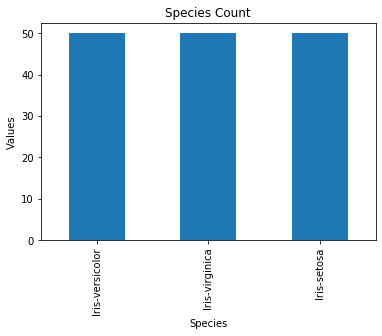

In [25]:
#barplot
species_count=data["Species"].value_counts()
species_count.plot(kind="bar")
plt.title("Species Count")
plt.xlabel("Species")
plt.ylabel("Values")

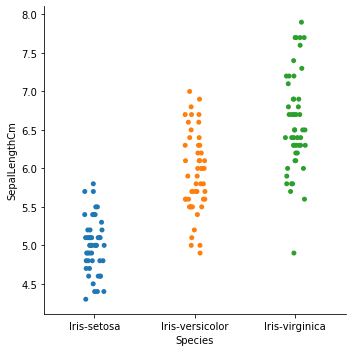

In [30]:
#catplot for categorical scatterplot 
sns.catplot(x="Species",y="SepalLengthCm",data=data)

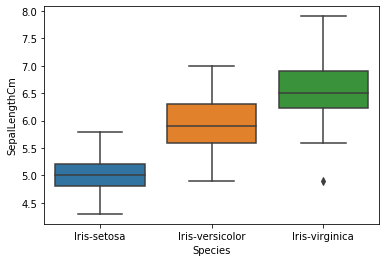

In [27]:
#boxplot
sns.boxplot(x="Species",y="SepalLengthCm",data=data)

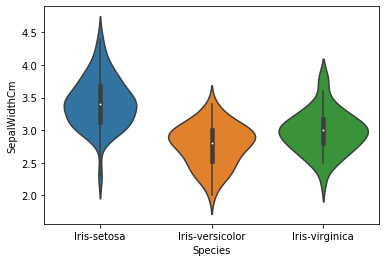

In [28]:
#Violinplot
sns.violinplot(x="Species",y="SepalWidthCm",data=data)

In [31]:
#to check correlation of columns in dataframe
cor=data.corr()
print(cor)

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


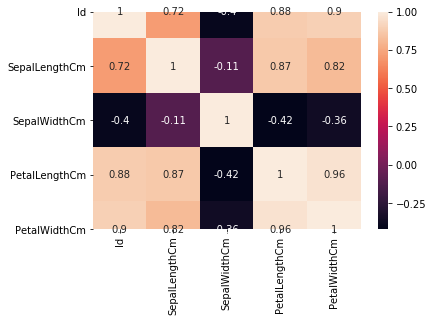

In [32]:
#heatmap
sns.heatmap(cor,annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013F045603C8>,
      dtype=object)

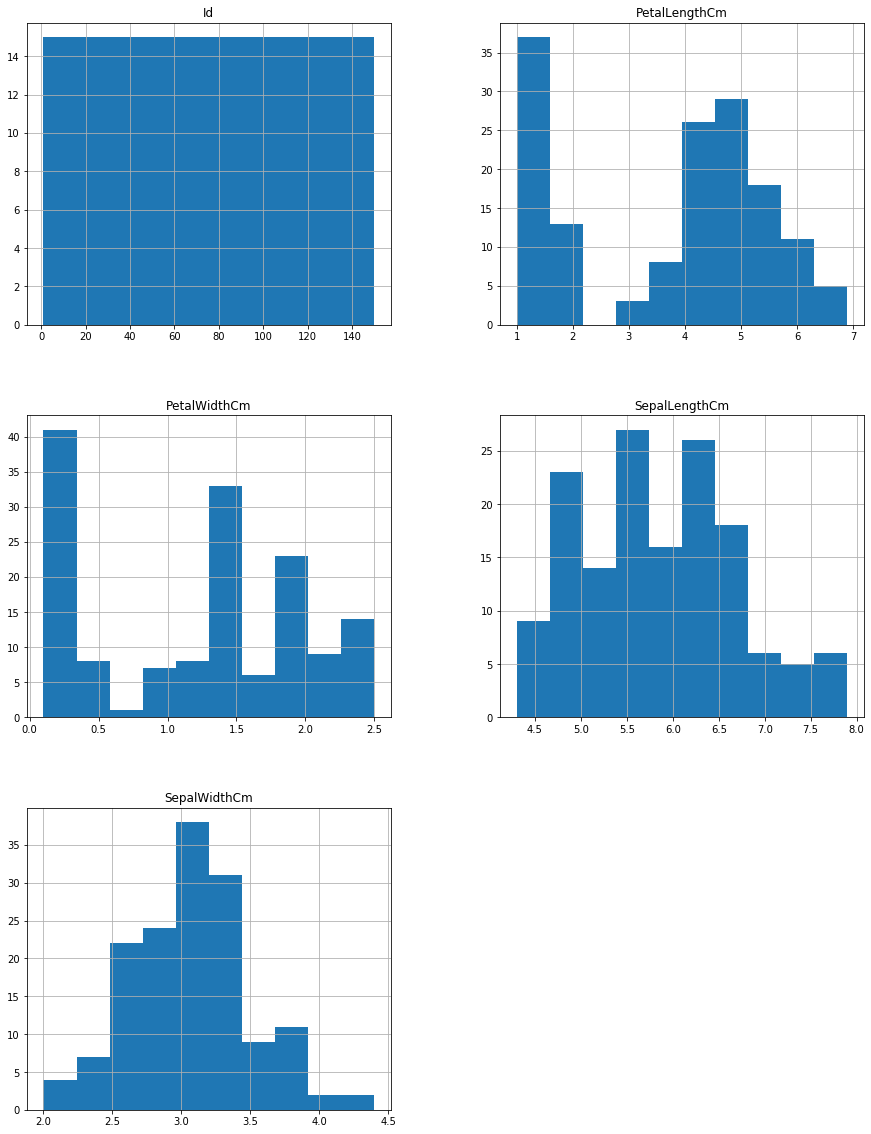

In [9]:
#Plot histogram for all columns
data.hist(figsize=(15,20))

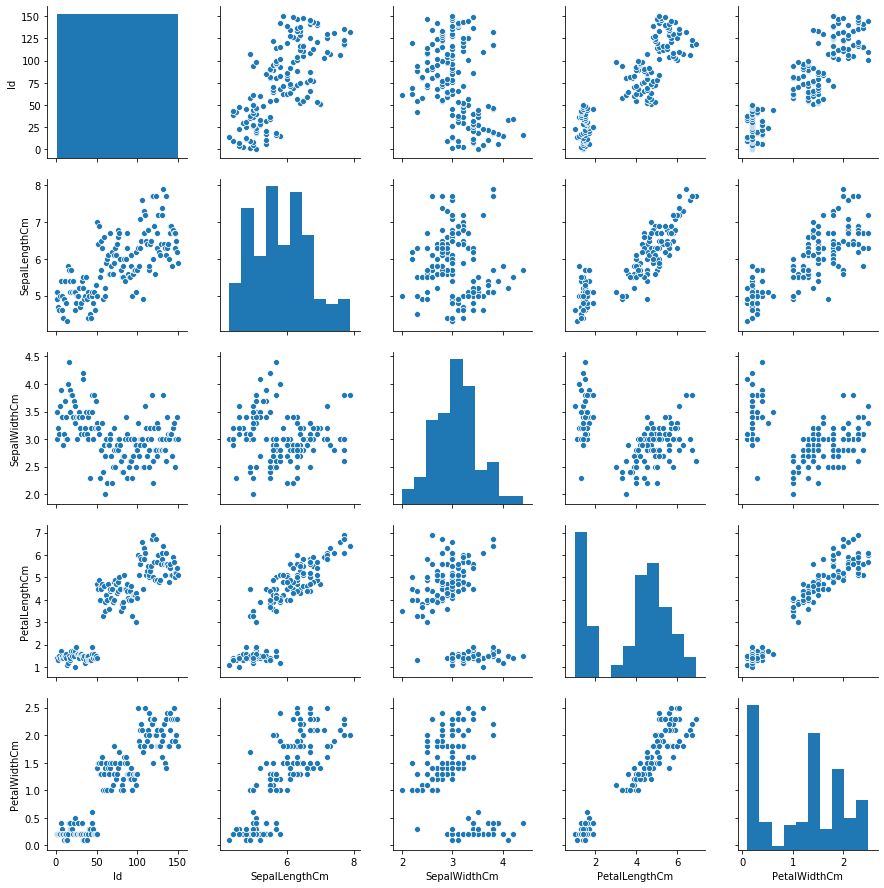

In [10]:
sns.pairplot(data)

In [11]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


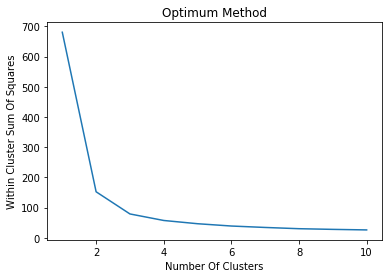

In [33]:
#Finding the optimum number of clusters using K-Means
#model fitting
data1=data.iloc[:,[1,2,3,4]].values
from sklearn.cluster import KMeans
iner=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',
                  max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data1)
    iner.append(kmeans.inertia_)
    
#Plotting the result into a line graph
plt.plot(range(1,11),iner)
plt.title('Optimum Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('Within Cluster Sum Of Squares')
plt.show()

In [17]:
data2=data.iloc[:,1:4].values
k=KMeans(n_clusters = 3)
km=k.fit(data2)
predict=km.predict(data2)

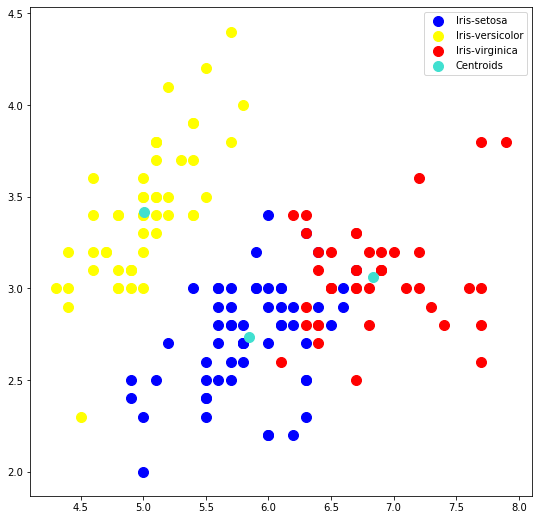

In [20]:
#Apply KMeans Clusturing 
plt.figure(figsize=(9,9))
plt.scatter(data2[predict==0,0],data2[predict==0,1],s = 100,c = 'blue',label= 'Iris-setosa')
plt.scatter(data2[predict==1,0],data2[predict==1,1],s = 100,c = 'yellow',label= 'Iris-versicolor')
plt.scatter(data2[predict==2,0],data2[predict==2,1],s = 100,c = 'red',label= 'Iris-virginica')

#Plotting the Centroids Of Clusters
plt.scatter(km.cluster_centers_[: , 0],km.cluster_centers_[:,1],
            s=100, c='turquoise' , label= 'Centroids')
plt.legend(loc= 'upper right')
plt.show()